In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")



from tensorflow.keras.optimizers import Adam

# XOR 문제를 딥러닝으로?

In [14]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )   # 4x2

y_data = np.array( [[0],         # 3x1 
                    [1],
                    [1],
                    [0] ] )

In [15]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [16]:

initX = tf.initializers.GlorotUniform()

w = tf.Variable(initX(shape=[2,1]))   # 2행 1열 
b = tf.Variable(initX(shape=[1]))

def compute_loss():
    z = tf.matmul(x,w) + b
    cost_i =tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels =y )
    cost = tf.reduce_mean(cost_i)
    return cost

optimizer = Adam(learning_rate=0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])
    print(i, compute_loss().numpy())


0 0.8791778
1 0.82754326
2 0.7849798
3 0.7523286
4 0.72989666
5 0.7172102
6 0.71288216
7 0.7147187
8 0.72010505
9 0.72653824
10 0.7320689
11 0.7354959
12 0.7363307
13 0.73464
14 0.730863
15 0.72564983
16 0.7197329
17 0.71382433
18 0.7085364
19 0.70431846
20 0.70141613
21 0.6998565
22 0.69946563
23 0.6999179
24 0.7008089
25 0.70173645
26 0.702371
27 0.7025026
28 0.7020582
29 0.70109093
30 0.6997496
31 0.69823635
32 0.69676214
33 0.69550717
34 0.6945923
35 0.69406426
36 0.69389665
37 0.6940049
38 0.6942704
39 0.69456816
40 0.69479287
41 0.69487584
42 0.6947932
43 0.6945635
44 0.6942364
45 0.6938776
46 0.6935519
47 0.6933091
48 0.69317555
49 0.6931513
50 0.6932138
51 0.6933263
52 0.69344795
53 0.69354355
54 0.6935905
55 0.69358194
56 0.6935258
57 0.6934401
58 0.69334745
59 0.6932686
60 0.69321775
61 0.6931999
62 0.69321144
63 0.69324195
64 0.6932783
65 0.693308
66 0.6933223
67 0.69331825
68 0.69329786
69 0.69326717
70 0.6932341
71 0.6932056
72 0.69318676
73 0.6931789
74 0.69318044
75 0.69

601 0.6931472
602 0.6931472
603 0.6931472
604 0.6931472
605 0.6931472
606 0.6931472
607 0.6931472
608 0.6931472
609 0.6931472
610 0.6931472
611 0.6931472
612 0.6931472
613 0.6931472
614 0.6931472
615 0.6931472
616 0.6931472
617 0.6931472
618 0.6931472
619 0.6931472
620 0.6931472
621 0.6931472
622 0.6931472
623 0.6931472
624 0.6931472
625 0.6931472
626 0.6931472
627 0.6931472
628 0.6931472
629 0.6931472
630 0.6931472
631 0.6931472
632 0.6931472
633 0.6931472
634 0.6931472
635 0.6931472
636 0.6931472
637 0.6931472
638 0.6931472
639 0.6931472
640 0.6931472
641 0.6931472
642 0.6931472
643 0.6931472
644 0.6931472
645 0.6931472
646 0.6931472
647 0.6931472
648 0.6931472
649 0.6931472
650 0.6931472
651 0.6931472
652 0.6931472
653 0.6931472
654 0.6931472
655 0.6931472
656 0.6931472
657 0.6931472
658 0.6931472
659 0.6931472
660 0.6931472
661 0.6931472
662 0.6931472
663 0.6931472
664 0.6931472
665 0.6931472
666 0.6931472
667 0.6931472
668 0.6931472
669 0.6931472
670 0.6931472
671 0.6931472
672 0.

In [18]:
def hxfn( xdata ):
    xd = tf.constant( xdata, tf.float32)
    z = tf.matmul( xd, w) + b
    hx = tf.nn.sigmoid( z )
    return (hx.numpy()>0.5) + 0
hxfn(x_data)  

array([[0],
       [0],
       [0],
       [0]])

## w와 b 하나로는 예측 못함.

## -> w와 b를 추가

In [20]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)

In [23]:
# (4x2) (2x2) (2x1)

initX = tf.initializers.GlorotUniform()
w1 = tf.Variable( initX( shape=[2,2] ) )
b1 = tf.Variable( initX( shape=[2] ) )

w2 = tf.Variable( initX( shape=[2,1] ) )
b2 = tf.Variable( initX( shape=[1] ) )


# 딥하게 하려면\
'''
w1 = tf.Variable( initX( shape=[2,100] ) )
b1 = tf.Variable( initX( shape=[100] ) )

w2 = tf.Variable( initX( shape=[100,1] ) )
b2 = tf.Variable( initX( shape=[1] ) )
'''
def compute_loss():
    z1 = tf.matmul(x,w1) + b1  # x 와 w1 matmul  4행2열 X 2행 2열 => 4행 2열 
    hx1 = tf.nn.sigmoid( z1 )  # z1을 sigmoid 함수에 넣음
    
    z = tf.matmul( hx1, w2  ) + b2  # 
    
    cost_i =tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels =y )
    cost = tf.reduce_mean(cost_i)
    return cost

In [24]:
optimizer = Adam(learning_rate=0.1)
for i in range(2000):
    optimizer.minimize(compute_loss, var_list=[w1,w2,b1,b2])
    print(i, compute_loss().numpy())

0 0.7541492
1 0.7163148
2 0.69586504
3 0.691377
4 0.6970935
5 0.70422125
6 0.7065351
7 0.7026973
8 0.694452
9 0.68446237
10 0.6751063
11 0.6679259
12 0.66345656
13 0.6613451
14 0.6606802
15 0.6603992
16 0.6596341
17 0.6579002
18 0.65511715
19 0.6515112
20 0.64747095
21 0.64340746
22 0.639644
23 0.63634825
24 0.6335129
25 0.6309832
26 0.6285213
27 0.6258867
28 0.6229051
29 0.61950827
30 0.6157365
31 0.6117104
32 0.6075861
33 0.6035102
34 0.5995859
35 0.5958574
36 0.59231275
37 0.58890265
38 0.58556473
39 0.58224636
40 0.5789205
41 0.57558906
42 0.5722784
43 0.569027
44 0.5658722
45 0.56283927
46 0.5599353
47 0.55715007
48 0.554461
49 0.55184084
50 0.54926586
51 0.54672146
52 0.54420453
53 0.54172164
54 0.53928554
55 0.5369092
56 0.53460217
57 0.5323664
58 0.53019595
59 0.52807844
60 0.5259977
61 0.5239369
62 0.52188134
63 0.51981926
64 0.5177425
65 0.51564413
66 0.51351726
67 0.5113523
68 0.50913644
69 0.5068539
70 0.5044863
71 0.50201595
72 0.49942824
73 0.4967142
74 0.49387217
75 0.49

575 0.34782574
576 0.34782246
577 0.34781903
578 0.3478156
579 0.34781224
580 0.3478089
581 0.3478056
582 0.34780237
583 0.34779903
584 0.34779572
585 0.3477925
586 0.3477893
587 0.3477861
588 0.3477828
589 0.34777963
590 0.3477764
591 0.34777322
592 0.34777007
593 0.34776688
594 0.3477638
595 0.34776065
596 0.3477575
597 0.34775433
598 0.34775132
599 0.34774828
600 0.34774518
601 0.34774223
602 0.3477391
603 0.34773603
604 0.34773317
605 0.34773016
606 0.3477271
607 0.34772417
608 0.34772125
609 0.34771824
610 0.34771538
611 0.34771243
612 0.34770948
613 0.34770653
614 0.3477037
615 0.34770086
616 0.34769788
617 0.34769508
618 0.34769222
619 0.3476894
620 0.34768656
621 0.34768373
622 0.34768087
623 0.3476781
624 0.34767535
625 0.34767258
626 0.34766987
627 0.3476671
628 0.34766436
629 0.34766167
630 0.34765887
631 0.34765616
632 0.3476535
633 0.34765092
634 0.3476482
635 0.34764555
636 0.3476429
637 0.34764025
638 0.34763753
639 0.347635
640 0.34763235
641 0.3476298
642 0.3476272
643

1173 0.34696853
1174 0.34696794
1175 0.34696746
1176 0.34696674
1177 0.34696627
1178 0.34696573
1179 0.34696507
1180 0.34696454
1181 0.346964
1182 0.34696347
1183 0.34696287
1184 0.34696227
1185 0.3469618
1186 0.3469612
1187 0.34696075
1188 0.3469601
1189 0.34695956
1190 0.346959
1191 0.34695852
1192 0.34695792
1193 0.34695747
1194 0.34695688
1195 0.34695625
1196 0.34695572
1197 0.34695527
1198 0.3469547
1199 0.34695405
1200 0.3469536
1201 0.3469531
1202 0.34695244
1203 0.34695193
1204 0.34695143
1205 0.34695086
1206 0.34695035
1207 0.34694985
1208 0.34694925
1209 0.3469488
1210 0.34694824
1211 0.34694767
1212 0.3469472
1213 0.34694675
1214 0.34694612
1215 0.3469456
1216 0.3469451
1217 0.3469446
1218 0.34694406
1219 0.3469435
1220 0.34694305
1221 0.34694248
1222 0.34694195
1223 0.34694144
1224 0.34694096
1225 0.34694046
1226 0.34693998
1227 0.34693953
1228 0.34693894
1229 0.34693837
1230 0.3469379
1231 0.34693733
1232 0.3469369
1233 0.34693632
1234 0.34693593
1235 0.34693545
1236 0.346

1725 0.3467744
1726 0.34677422
1727 0.34677386
1728 0.34677368
1729 0.3467735
1730 0.3467732
1731 0.34677315
1732 0.34677297
1733 0.34677267
1734 0.34677255
1735 0.3467723
1736 0.34677202
1737 0.3467719
1738 0.34677166
1739 0.34677136
1740 0.3467713
1741 0.34677112
1742 0.34677085
1743 0.3467706
1744 0.34677038
1745 0.34677026
1746 0.34676996
1747 0.34676978
1748 0.34676954
1749 0.34676942
1750 0.34676915
1751 0.34676886
1752 0.34676874
1753 0.34676856
1754 0.34676832
1755 0.3467682
1756 0.346768
1757 0.3467678
1758 0.34676751
1759 0.34676734
1760 0.3467672
1761 0.3467669
1762 0.34676677
1763 0.3467666
1764 0.34676632
1765 0.34676614
1766 0.34676597
1767 0.34676582
1768 0.34676552
1769 0.34676522
1770 0.3467651
1771 0.34676495
1772 0.34676465
1773 0.34676456
1774 0.3467644
1775 0.3467642
1776 0.34676406
1777 0.34676376
1778 0.34676364
1779 0.34676337
1780 0.3467632
1781 0.34676293
1782 0.34676275
1783 0.3467625
1784 0.34676242
1785 0.34676218
1786 0.34676203
1787 0.34676173
1788 0.3467

In [25]:
def hxfn( xdata ):
    xd = tf.constant( xdata, tf.float32)
    z1 = tf.matmul( xd, w1) + b1  
    hx1 = tf.nn.sigmoid( z1 )
    z = tf.matmul(hx1,w2)+b2
    hx = tf.nn.sigmoid( z )
    return (hx.numpy()>0.5) + 0
hxfn(x_data)

array([[0],
       [0],
       [1],
       [1]])

## w와 b를 2번 사용하여 문제해결

# keras 사용해서 XOR 해결

In [26]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )

In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

dense1 = Dense( units=100, input_dim=2 ,activation="sigmoid") # 2x100, b:100
dense2 = Dense( units=1, input_dim=100 ,activation="sigmoid") # 100x1 b: 1
model = Sequential( [dense1, dense2])
model.compile( loss="binary_crossentropy" ,optimizer=Adam(0.1), metrics=['acc'] )
h = model.fit( x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 262ms/step - loss: 0.8334 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.3021 - acc: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 998us/step - loss: 1.3574 - acc: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 998us/step - loss: 0.7392 - acc: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2888 - acc: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2610 - acc: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 997us/step - loss: 0.8849 - acc: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8608 - acc: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 996us/step - loss: 0.9891 - acc: 0.5000
Epoch 11/1000
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 997us/step - loss: 0.1116 - acc: 1.0000
Epoch 88/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1044 - acc: 1.0000
Epoch 89/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0975 - acc: 1.0000
Epoch 90/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0911 - acc: 1.0000
Epoch 91/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0850 - acc: 1.0000
Epoch 92/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0794 - acc: 1.0000
Epoch 93/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0741 - acc: 1.0000
Epoch 94/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0693 - acc: 1.0000
Epoch 95/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0647 - acc: 1.0000
Epoch 96/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0605 - acc: 1.0000
Epoch 97/1000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 997us/step - loss: 0.0056 - acc: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - acc: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - acc: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - acc: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0053 - acc: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0052 - acc: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0052 - acc: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051 - acc: 1.0000
Epoch 180/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0050 - acc: 1.0000
Epoch 181/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0050 - acc: 1.0000
Epoch 182/1000
1/1 [==============================] - 0s 2m

1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 258/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0023 - acc: 1.0000
Epoch 259/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 260/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 261/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0023 - acc: 1.0000
Epoch 262/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - acc: 1.0000
Epoch 263/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0022 - acc: 1.0000
Epoch 264/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - acc: 1.0000
Epoch 265/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - acc: 1.0000
Epoch 266/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0022 - acc: 1.0000
Epoch 267/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 997us/step - loss: 0.0013 - acc: 1.0000
Epoch 343/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 344/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 345/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0013 - acc: 1.0000
Epoch 346/1000
1/1 [==============================] - 0s 995us/step - loss: 0.0013 - acc: 1.0000
Epoch 347/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 348/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0013 - acc: 1.0000
Epoch 349/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 350/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0013 - acc: 1.0000
Epoch 351/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 352/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 997us/step - loss: 8.8400e-04 - acc: 1.0000
Epoch 427/1000
1/1 [==============================] - 0s 998us/step - loss: 8.8015e-04 - acc: 1.0000
Epoch 428/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.7634e-04 - acc: 1.0000
Epoch 429/1000
1/1 [==============================] - 0s 997us/step - loss: 8.7254e-04 - acc: 1.0000
Epoch 430/1000
1/1 [==============================] - 0s 997us/step - loss: 8.6878e-04 - acc: 1.0000
Epoch 431/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.6504e-04 - acc: 1.0000
Epoch 432/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.6132e-04 - acc: 1.0000
Epoch 433/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.5763e-04 - acc: 1.0000
Epoch 434/1000
1/1 [==============================] - 0s 997us/step - loss: 8.5397e-04 - acc: 1.0000
Epoch 435/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.5033e-04 - acc: 1.0000
Epoch 436/1000


1/1 [==============================] - 0s 2ms/step - loss: 6.3855e-04 - acc: 1.0000
Epoch 509/1000
1/1 [==============================] - 0s 997us/step - loss: 6.3625e-04 - acc: 1.0000
Epoch 510/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3395e-04 - acc: 1.0000
Epoch 511/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3168e-04 - acc: 1.0000
Epoch 512/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2941e-04 - acc: 1.0000
Epoch 513/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2716e-04 - acc: 1.0000
Epoch 514/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.2492e-04 - acc: 1.0000
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2269e-04 - acc: 1.0000
Epoch 516/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2047e-04 - acc: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.1827e-04 - acc: 1.0000
Epoch 518/1000
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 4.8531e-04 - acc: 1.0000
Epoch 591/1000
1/1 [==============================] - 0s 998us/step - loss: 4.8381e-04 - acc: 1.0000
Epoch 592/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.8232e-04 - acc: 1.0000
Epoch 593/1000
1/1 [==============================] - 0s 998us/step - loss: 4.8083e-04 - acc: 1.0000
Epoch 594/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.7935e-04 - acc: 1.0000
Epoch 595/1000
1/1 [==============================] - 0s 998us/step - loss: 4.7787e-04 - acc: 1.0000
Epoch 596/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.7641e-04 - acc: 1.0000
Epoch 597/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.7495e-04 - acc: 1.0000
Epoch 598/1000
1/1 [==============================] - 0s 998us/step - loss: 4.7350e-04 - acc: 1.0000
Epoch 599/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.7205e-04 - acc: 1.0000
Epoch 600/1000
1/

1/1 [==============================] - 0s 2ms/step - loss: 3.8247e-04 - acc: 1.0000
Epoch 673/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.8143e-04 - acc: 1.0000
Epoch 674/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.8040e-04 - acc: 1.0000
Epoch 675/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7937e-04 - acc: 1.0000
Epoch 676/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7834e-04 - acc: 1.0000
Epoch 677/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7732e-04 - acc: 1.0000
Epoch 678/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7630e-04 - acc: 1.0000
Epoch 679/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7529e-04 - acc: 1.0000
Epoch 680/1000
1/1 [==============================] - 0s 998us/step - loss: 3.7428e-04 - acc: 1.0000
Epoch 681/1000
1/1 [==============================] - 0s 996us/step - loss: 3.7327e-04 - acc: 1.0000
Epoch 682/1000
1/1 [=

1/1 [==============================] - 0s 999us/step - loss: 3.0974e-04 - acc: 1.0000
Epoch 755/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0899e-04 - acc: 1.0000
Epoch 756/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0824e-04 - acc: 1.0000
Epoch 757/1000
1/1 [==============================] - 0s 997us/step - loss: 3.0749e-04 - acc: 1.0000
Epoch 758/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0675e-04 - acc: 1.0000
Epoch 759/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0601e-04 - acc: 1.0000
Epoch 760/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.0527e-04 - acc: 1.0000
Epoch 761/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0453e-04 - acc: 1.0000
Epoch 762/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0380e-04 - acc: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 998us/step - loss: 3.0307e-04 - acc: 1.0000
Epoch 764/1000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 2.5621e-04 - acc: 1.0000
Epoch 837/1000
1/1 [==============================] - 0s 993us/step - loss: 2.5565e-04 - acc: 1.0000
Epoch 838/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5508e-04 - acc: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 997us/step - loss: 2.5452e-04 - acc: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5397e-04 - acc: 1.0000
Epoch 841/1000
1/1 [==============================] - 0s 998us/step - loss: 2.5341e-04 - acc: 1.0000
Epoch 842/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5286e-04 - acc: 1.0000
Epoch 843/1000
1/1 [==============================] - 0s 998us/step - loss: 2.5230e-04 - acc: 1.0000
Epoch 844/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5175e-04 - acc: 1.0000
Epoch 845/1000
1/1 [==============================] - 0s 998us/step - loss: 2.5121e-04 - acc: 1.0000
Epoch 846/1000


1/1 [==============================] - 0s 997us/step - loss: 2.1557e-04 - acc: 1.0000
Epoch 919/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1513e-04 - acc: 1.0000
Epoch 920/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1470e-04 - acc: 1.0000
Epoch 921/1000
1/1 [==============================] - 0s 998us/step - loss: 2.1427e-04 - acc: 1.0000
Epoch 922/1000
1/1 [==============================] - 0s 997us/step - loss: 2.1384e-04 - acc: 1.0000
Epoch 923/1000
1/1 [==============================] - 0s 997us/step - loss: 2.1341e-04 - acc: 1.0000
Epoch 924/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1298e-04 - acc: 1.0000
Epoch 925/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1256e-04 - acc: 1.0000
Epoch 926/1000
1/1 [==============================] - 0s 997us/step - loss: 2.1213e-04 - acc: 1.0000
Epoch 927/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1171e-04 - acc: 1.0000
Epoch 928/1000


1/1 [==============================] - 0s 998us/step - loss: 1.8392e-04 - acc: 1.0000


In [29]:
(model.predict(x_data)>0.5)+0

array([[0],
       [1],
       [1],
       [0]])

In [30]:
w,b = dense1.get_weights()  # 2행 100열
w,b

(array([[-0.8942287 , -4.117841  , -1.5266699 ,  3.6859634 , -1.6245114 ,
         -0.56069285, -2.06207   , -1.3457397 ,  4.4103622 , -5.0909743 ,
         -3.8518705 , -1.1520585 , -7.2866693 , -1.0149941 ,  0.8286138 ,
         -1.176502  , -2.6649227 , -7.3382645 , -5.019046  , -0.9928111 ,
         -2.0457304 , -6.601531  , -0.3056575 , -1.1653392 , -8.316661  ,
          3.25375   , -1.2290939 ,  0.6192847 , -2.1962988 , -5.463659  ,
         -2.412493  ,  0.869998  , -1.291719  , -2.7288852 , -1.2447195 ,
         -7.887472  , -3.0131357 , -6.7463403 , -2.0155003 , -1.2552469 ,
          2.8264613 , -1.1642966 , -4.536794  , -3.92996   , -3.9266253 ,
         -4.468724  , -5.3194513 , -0.84108126, -4.515367  ,  0.10846942,
          0.34965724, -2.2928894 , -3.5900834 , -1.1005096 ,  1.6546926 ,
         -2.6920671 , -7.274785  , -4.435902  , -2.8252013 ,  0.9865848 ,
          0.43176833, -1.2907331 ,  1.6103859 ,  1.061911  , -2.201286  ,
         -1.860968  , -0.84347314, -7.

In [31]:
w,b = dense2.get_weights()  # 100행 1열
w,b

(array([[ 0.7494414 ],
        [ 1.0025156 ],
        [ 0.02807041],
        [-3.0986788 ],
        [ 0.02834658],
        [ 0.4087795 ],
        [ 0.2974695 ],
        [ 0.27107495],
        [-3.4386868 ],
        [-0.8198235 ],
        [ 1.0417575 ],
        [ 0.27943918],
        [-1.7004067 ],
        [ 0.69461524],
        [ 0.57479143],
        [ 0.27141294],
        [ 0.8168735 ],
        [-1.7326245 ],
        [ 1.1561706 ],
        [ 0.22664998],
        [-0.09260619],
        [-1.7561046 ],
        [-0.09565286],
        [ 0.09987102],
        [-2.7619357 ],
        [-2.7844174 ],
        [ 0.8381005 ],
        [ 1.0042782 ],
        [-0.1070867 ],
        [ 0.9638448 ],
        [ 0.8901963 ],
        [ 0.5756439 ],
        [ 0.2975249 ],
        [-0.21093296],
        [ 0.17062162],
        [-2.2343044 ],
        [-0.34434015],
        [-1.524275  ],
        [ 0.854314  ],
        [ 0.24872848],
        [ 1.3857806 ],
        [ 0.2760815 ],
        [ 0.6699487 ],
        [-0



##  (4x2)  (2x64) (64x32) (32x1)  ->  4x2



In [33]:
modelNN = Sequential()
modelNN.add( Dense( units=64, input_dim=2 ,activation="sigmoid") )
modelNN.add( Dense( units=32, activation="sigmoid") )
modelNN.add( Dense( units=1,  activation="sigmoid") )
modelNN.compile( loss="binary_crossentropy" ,optimizer=Adam(0.1), metrics=['acc'] )
h = modelNN.fit( x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 250ms/step - loss: 0.7712 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.9539 - acc: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5520 - acc: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.0306 - acc: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 997us/step - loss: 0.7561 - acc: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6929 - acc: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7174 - acc: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 895us/step - loss: 0.7544 - acc: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7733 - acc: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7751 - acc: 0.5000
Epoch 11/1000
1/1 [==============================] - 0s 997us

1/1 [==============================] - 0s 996us/step - loss: 0.4754 - acc: 0.7500
Epoch 88/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4728 - acc: 0.7500
Epoch 89/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4686 - acc: 0.7500
Epoch 90/1000
1/1 [==============================] - 0s 997us/step - loss: 0.4647 - acc: 0.7500
Epoch 91/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4599 - acc: 0.7500
Epoch 92/1000
1/1 [==============================] - 0s 996us/step - loss: 0.4538 - acc: 0.7500
Epoch 93/1000
1/1 [==============================] - 0s 997us/step - loss: 0.4450 - acc: 0.7500
Epoch 94/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4332 - acc: 0.7500
Epoch 95/1000
1/1 [==============================] - 0s 997us/step - loss: 0.4213 - acc: 0.7500
Epoch 96/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4101 - acc: 0.7500
Epoch 97/1000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0138 - acc: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - acc: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - acc: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0126 - acc: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0123 - acc: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0120 - acc: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0117 - acc: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0114 - acc: 1.0000
Epoch 180/1000
1/1 [==============================] - 0s 996us/step - loss: 0.0112 - acc: 1.0000
Epoch 181/1000
1/1 [==============================] - 0s 996us/step - loss: 0.0109 - acc: 1.0000
Epoch 182/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - acc: 1.0000
Epoch 258/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - acc: 1.0000
Epoch 259/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041 - acc: 1.0000
Epoch 260/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0041 - acc: 1.0000
Epoch 261/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - acc: 1.0000
Epoch 262/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - acc: 1.0000
Epoch 263/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - acc: 1.0000
Epoch 264/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - acc: 1.0000
Epoch 265/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - acc: 1.0000
Epoch 266/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - acc: 1.0000
Epoch 267/1000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - acc: 1.0000
Epoch 344/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - acc: 1.0000
Epoch 345/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - acc: 1.0000
Epoch 346/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - acc: 1.0000
Epoch 347/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0023 - acc: 1.0000
Epoch 348/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0023 - acc: 1.0000
Epoch 349/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0023 - acc: 1.0000
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 351/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 352/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000
Epoch 353/1000
1/1 [==============================] - 0s 2ms/

Epoch 429/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 430/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0016 - acc: 1.0000
Epoch 431/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 432/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0016 - acc: 1.0000
Epoch 433/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 434/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 435/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0016 - acc: 1.0000
Epoch 436/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 437/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0016 - acc: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - acc: 1.0000
Epoch 439/1000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 515/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - acc: 1.0000
Epoch 516/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 518/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 519/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 520/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - acc: 1.0000
Epoch 522/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - acc: 1.0000
Epoch 523/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0011 - acc: 1.0000
Epoch 524/1000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 998us/step - loss: 9.1068e-04 - acc: 1.0000
Epoch 599/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.0813e-04 - acc: 1.0000
Epoch 600/1000
1/1 [==============================] - 0s 997us/step - loss: 9.0558e-04 - acc: 1.0000
Epoch 601/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.0304e-04 - acc: 1.0000
Epoch 602/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.0052e-04 - acc: 1.0000
Epoch 603/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.9800e-04 - acc: 1.0000
Epoch 604/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.9550e-04 - acc: 1.0000
Epoch 605/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.9301e-04 - acc: 1.0000
Epoch 606/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.9053e-04 - acc: 1.0000
Epoch 607/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.8806e-04 - acc: 1.0000
Epoch 608/1000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 7.3372e-04 - acc: 1.0000
Epoch 681/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.3192e-04 - acc: 1.0000
Epoch 682/1000
1/1 [==============================] - 0s 998us/step - loss: 7.3011e-04 - acc: 1.0000
Epoch 683/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.2832e-04 - acc: 1.0000
Epoch 684/1000
1/1 [==============================] - 0s 997us/step - loss: 7.2653e-04 - acc: 1.0000
Epoch 685/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.2475e-04 - acc: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 997us/step - loss: 7.2298e-04 - acc: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.2121e-04 - acc: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.1945e-04 - acc: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 998us/step - loss: 7.1770e-04 - acc: 1.0000
Epoch 690/1000
1/

1/1 [==============================] - 0s 2ms/step - loss: 6.0596e-04 - acc: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 997us/step - loss: 6.0462e-04 - acc: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.0329e-04 - acc: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.0196e-04 - acc: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 997us/step - loss: 6.0064e-04 - acc: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.9932e-04 - acc: 1.0000
Epoch 768/1000
1/1 [==============================] - 0s 997us/step - loss: 5.9801e-04 - acc: 1.0000
Epoch 769/1000
1/1 [==============================] - 0s 997us/step - loss: 5.9670e-04 - acc: 1.0000
Epoch 770/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.9540e-04 - acc: 1.0000
Epoch 771/1000
1/1 [==============================] - 0s 997us/step - loss: 5.9410e-04 - acc: 1.0000
Epoch 772/1000


1/1 [==============================] - 0s 998us/step - loss: 5.1003e-04 - acc: 1.0000
Epoch 845/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.0901e-04 - acc: 1.0000
Epoch 846/1000
1/1 [==============================] - 0s 997us/step - loss: 5.0799e-04 - acc: 1.0000
Epoch 847/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.0697e-04 - acc: 1.0000
Epoch 848/1000
1/1 [==============================] - 0s 997us/step - loss: 5.0596e-04 - acc: 1.0000
Epoch 849/1000
1/1 [==============================] - 0s 997us/step - loss: 5.0496e-04 - acc: 1.0000
Epoch 850/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.0395e-04 - acc: 1.0000
Epoch 851/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.0295e-04 - acc: 1.0000
Epoch 852/1000
1/1 [==============================] - 0s 997us/step - loss: 5.0195e-04 - acc: 1.0000
Epoch 853/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.0096e-04 - acc: 1.0000
Epoch 854/1000


1/1 [==============================] - 0s 997us/step - loss: 4.3571e-04 - acc: 1.0000
Epoch 927/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3491e-04 - acc: 1.0000
Epoch 928/1000
1/1 [==============================] - 0s 997us/step - loss: 4.3411e-04 - acc: 1.0000
Epoch 929/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3331e-04 - acc: 1.0000
Epoch 930/1000
1/1 [==============================] - 0s 998us/step - loss: 4.3252e-04 - acc: 1.0000
Epoch 931/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3172e-04 - acc: 1.0000
Epoch 932/1000
1/1 [==============================] - 0s 997us/step - loss: 4.3093e-04 - acc: 1.0000
Epoch 933/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3014e-04 - acc: 1.0000
Epoch 934/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.2936e-04 - acc: 1.0000
Epoch 935/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.2857e-04 - acc: 1.0000
Epoch 936/1000
1/

In [37]:
(modelNN.predict(x_data)>0.5)

array([[False],
       [ True],
       [ True],
       [False]])

In [36]:

(modelNN.predict(x_data)>0.5)+0

array([[0],
       [1],
       [1],
       [0]])

### 일반 로지스틱모델 -> XOR예측


In [38]:
x_data = np.array( [[0,0],
                    [0,1],
                    [1,0],
                    [1,1]] )

y_data = np.array( [[0],
                    [1],
                    [1],
                    [0] ] )

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [40]:
model_logi = LogisticRegression(max_iter=1000, verbose=1)
model_logi.fit(x_data,y_data)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, verbose=1)

In [41]:
model_logi.coef_     # 기울기

array([[0., 0.]])

In [42]:
model_logi.intercept_ # 절편

array([0.])

In [43]:
model_logi.predict(x_data) # x데이터 예측 값

array([0, 0, 0, 0])

In [44]:
model_logi.score(x_data, y_data) # 로지스틱모델 정확도

0.5

# 사이킷런에서 지원하는딥러닝  

----

 - from sklearn.linear_model import LogisticRegression
 - from sklearn.neural_network import MLPClassifier


```
hidden_layer_sizes=(100,)
(4x2)  (2x100)   (100x1)
```

In [45]:

model_mlp = MLPClassifier(hidden_layer_sizes=(100,) ,max_iter=1000,verbose=True  )
model_mlp.fit(x_data,y_data)

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.69253416
Iteration 2, loss = 0.69078158
Iteration 3, loss = 0.68902116
Iteration 4, loss = 0.68728089
Iteration 5, loss = 0.68557301
Iteration 6, loss = 0.68388466
Iteration 7, loss = 0.68223323
Iteration 8, loss = 0.68057855
Iteration 9, loss = 0.67892950
Iteration 10, loss = 0.67729805
Iteration 11, loss = 0.67567697
Iteration 12, loss = 0.67406325
Iteration 13, loss = 0.67245103
Iteration 14, loss = 0.67084376
Iteration 15, loss = 0.66927035
Iteration 16, loss = 0.66768945
Iteration 17, loss = 0.66612456
Iteration 18, loss = 0.66457986
Iteration 19, loss = 0.66304551
Iteration 20, loss = 0.66152101
Iteration 21, loss = 0.66000777
Iteration 22, loss = 0.65851844
Iteration 23, loss = 0.65710833
Iteration 24, loss = 0.65572027
Iteration 25, loss = 0.65434678
Iteration 26, loss = 0.65301778
Iteration 27, loss = 0.65173302
Iteration 28, loss = 0.65042016
Iteration 29, loss = 0.64911013
Iteration 30, loss = 0.64778750
Iteration 31, loss = 0.64649104
Iteration 32, los

Iteration 524, loss = 0.07505189
Iteration 525, loss = 0.07470256
Iteration 526, loss = 0.07435581
Iteration 527, loss = 0.07400717
Iteration 528, loss = 0.07366314
Iteration 529, loss = 0.07332500
Iteration 530, loss = 0.07298865
Iteration 531, loss = 0.07265175
Iteration 532, loss = 0.07231513
Iteration 533, loss = 0.07199008
Iteration 534, loss = 0.07165575
Iteration 535, loss = 0.07132281
Iteration 536, loss = 0.07099871
Iteration 537, loss = 0.07067557
Iteration 538, loss = 0.07035169
Iteration 539, loss = 0.07003481
Iteration 540, loss = 0.06971832
Iteration 541, loss = 0.06940388
Iteration 542, loss = 0.06908609
Iteration 543, loss = 0.06877224
Iteration 544, loss = 0.06845722
Iteration 545, loss = 0.06815389
Iteration 546, loss = 0.06784699
Iteration 547, loss = 0.06753224
Iteration 548, loss = 0.06723543
Iteration 549, loss = 0.06693483
Iteration 550, loss = 0.06663554
Iteration 551, loss = 0.06633539
Iteration 552, loss = 0.06603952
Iteration 553, loss = 0.06574761
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

In [46]:
model_mlp.predict(x_data)

array([0, 1, 1, 0])

In [47]:
model_mlp.coefs_  


# 4 x 2  matmul  2 x 100 => 4 x 100 
# 4 x 100 matmul 100 x 1 => 4 x 1    


[array([[-4.83415119e-01,  6.18483934e-02,  6.49294045e-01,
         -5.63591718e-01, -4.55794625e-01, -1.85197280e-19,
          2.49703466e-20,  6.39014760e-01, -2.08881713e-01,
         -4.79433016e-01,  5.74123236e-01,  3.07101150e-15,
         -3.57835421e-02, -3.87952772e-20,  1.56088644e-06,
         -7.05210160e-02, -4.96018096e-01,  2.61966725e-20,
          1.91036625e-01, -4.38659592e-20,  1.39293456e-01,
          2.51092507e-01, -5.21742003e-01,  1.12293886e-01,
          2.74625121e-21,  1.80205674e-20,  1.85148187e-20,
         -1.29841719e-01,  6.57464867e-01,  3.77859850e-16,
          5.41811911e-02, -1.61756318e-02,  4.11254145e-02,
         -2.73084146e-08, -4.55511648e-01,  1.64621320e-20,
          1.59837796e-01,  4.77674184e-01,  6.16077861e-02,
         -5.53454830e-01,  3.13604877e-21, -4.62044789e-01,
          1.73727977e-01, -2.11799243e-06,  4.78559692e-01,
          1.56043973e-22,  7.01606787e-02,  1.64813553e-01,
          4.84055296e-01,  5.95824775e-0

In [48]:
model_mlp.coefs_[0].shape , model_mlp.coefs_[1].shape #  기울기

((2, 100), (100, 1))

```
hidden_layer_sizes=(100,50)
(4x2)  (2x100) (100x50)  (50x1)
```

In [49]:
model_mlp2 = MLPClassifier(hidden_layer_sizes=(100,50) ,max_iter=1000,verbose=True  )
model_mlp2.fit(x_data,y_data)

Iteration 1, loss = 0.71416030
Iteration 2, loss = 0.70609485
Iteration 3, loss = 0.69846042
Iteration 4, loss = 0.69155963
Iteration 5, loss = 0.68510691
Iteration 6, loss = 0.67974564
Iteration 7, loss = 0.67471946
Iteration 8, loss = 0.66997972
Iteration 9, loss = 0.66534803
Iteration 10, loss = 0.66113000
Iteration 11, loss = 0.65747603
Iteration 12, loss = 0.65449375
Iteration 13, loss = 0.65123780
Iteration 14, loss = 0.64800516
Iteration 15, loss = 0.64461064
Iteration 16, loss = 0.64127382
Iteration 17, loss = 0.63807843
Iteration 18, loss = 0.63494019
Iteration 19, loss = 0.63172284
Iteration 20, loss = 0.62846434
Iteration 21, loss = 0.62509627
Iteration 22, loss = 0.62187898
Iteration 23, loss = 0.61840729
Iteration 24, loss = 0.61500023
Iteration 25, loss = 0.61158711
Iteration 26, loss = 0.60817745
Iteration 27, loss = 0.60467756
Iteration 28, loss = 0.60111900
Iteration 29, loss = 0.59754429
Iteration 30, loss = 0.59394875
Iteration 31, loss = 0.59023140
Iteration 32, los

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, verbose=True)

In [50]:
len(model_mlp2.coefs_)

3

In [51]:
# 1번째, 2번째, 3번째 행렬 모양
model_mlp2.coefs_[0].shape,model_mlp2.coefs_[1].shape,model_mlp2.coefs_[2].shape

((2, 100), (100, 50), (50, 1))

```
hidden_layer_sizes=(100,50,20)
(4x2)  (2x100)   (100x50) (50x20)  (20x1)
```

In [53]:
model_mlp3 = MLPClassifier(hidden_layer_sizes=(100,50,20) ,max_iter=1000,verbose=True  )
model_mlp3.fit(x_data,y_data)

Iteration 1, loss = 0.70055683
Iteration 2, loss = 0.69537665
Iteration 3, loss = 0.69039339
Iteration 4, loss = 0.68583462
Iteration 5, loss = 0.68119520
Iteration 6, loss = 0.67698031
Iteration 7, loss = 0.67287644
Iteration 8, loss = 0.66860661
Iteration 9, loss = 0.66455377
Iteration 10, loss = 0.66090281
Iteration 11, loss = 0.65735211
Iteration 12, loss = 0.65389609
Iteration 13, loss = 0.65046810
Iteration 14, loss = 0.64711447
Iteration 15, loss = 0.64335451
Iteration 16, loss = 0.63934375
Iteration 17, loss = 0.63544510
Iteration 18, loss = 0.63213441
Iteration 19, loss = 0.62885737
Iteration 20, loss = 0.62531190
Iteration 21, loss = 0.62164238
Iteration 22, loss = 0.61796049
Iteration 23, loss = 0.61423026
Iteration 24, loss = 0.61060375
Iteration 25, loss = 0.60652559
Iteration 26, loss = 0.60238156
Iteration 27, loss = 0.59819379
Iteration 28, loss = 0.59395855
Iteration 29, loss = 0.58948687
Iteration 30, loss = 0.58496010
Iteration 31, loss = 0.58024327
Iteration 32, los

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, verbose=True)

In [55]:
model_mlp3.coefs_[0].shape,model_mlp3.coefs_[1].shape,model_mlp3.coefs_[2].shape,model_mlp3.coefs_[3].shape

((2, 100), (100, 50), (50, 20), (20, 1))

In [54]:
model_mlp3.predict(x_data)
# 사이킷런의 mlp사용하여 xor문제 해결

array([0, 1, 1, 0])

# 27일 퀴즈 

# 1.breast_cancer

```
breast_cancer 데이터셋을 이용하여 딥러닝으로
처리하시요(sklearn, 케라스버전)
1) train, test 분리
2) test 1번째 행 암 여부 예측
3)train, test 정확도 구하기
```

## 데이터 로드

In [103]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [104]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## x,y데이터 분리 및 스케일링

In [136]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]


from sklearn.preprocessing import MinMaxScaler
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)


x = tf.constant(x_dataN, tf.float32)
y = tf.constant(y_data, tf.float32)

## 1.사이킷런(MLP)

### train,test분리

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_dataN,y_data,test_size=0.2, stratify=y_data)

In [147]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [148]:
model_mlp = MLPClassifier(hidden_layer_sizes=(100,) ,max_iter=1000,verbose=True  )
model_mlp.fit(x_train,y_train)

Iteration 1, loss = 0.65318655
Iteration 2, loss = 0.63392052
Iteration 3, loss = 0.61680173
Iteration 4, loss = 0.60087338
Iteration 5, loss = 0.58624464
Iteration 6, loss = 0.57305949
Iteration 7, loss = 0.56025626
Iteration 8, loss = 0.54701948
Iteration 9, loss = 0.53363090
Iteration 10, loss = 0.52054856
Iteration 11, loss = 0.50790699
Iteration 12, loss = 0.49580716
Iteration 13, loss = 0.48323625
Iteration 14, loss = 0.47104645
Iteration 15, loss = 0.45897070
Iteration 16, loss = 0.44726731
Iteration 17, loss = 0.43598886
Iteration 18, loss = 0.42476765
Iteration 19, loss = 0.41316679
Iteration 20, loss = 0.40249824
Iteration 21, loss = 0.39223284
Iteration 22, loss = 0.38194450
Iteration 23, loss = 0.37215213
Iteration 24, loss = 0.36265030
Iteration 25, loss = 0.35361359
Iteration 26, loss = 0.34482527
Iteration 27, loss = 0.33661624
Iteration 28, loss = 0.32856119
Iteration 29, loss = 0.32087006
Iteration 30, loss = 0.31345731
Iteration 31, loss = 0.30653398
Iteration 32, los

Iteration 292, loss = 0.06665075
Iteration 293, loss = 0.06653689
Iteration 294, loss = 0.06649953
Iteration 295, loss = 0.06639228
Iteration 296, loss = 0.06653428
Iteration 297, loss = 0.06634861
Iteration 298, loss = 0.06604310
Iteration 299, loss = 0.06633984
Iteration 300, loss = 0.06621179
Iteration 301, loss = 0.06593689
Iteration 302, loss = 0.06604556
Iteration 303, loss = 0.06582059
Iteration 304, loss = 0.06562931
Iteration 305, loss = 0.06540736
Iteration 306, loss = 0.06537505
Iteration 307, loss = 0.06543192
Iteration 308, loss = 0.06535269
Iteration 309, loss = 0.06521660
Iteration 310, loss = 0.06521341
Iteration 311, loss = 0.06508400
Iteration 312, loss = 0.06477712
Iteration 313, loss = 0.06472294
Iteration 314, loss = 0.06473835
Iteration 315, loss = 0.06466261
Iteration 316, loss = 0.06462458
Iteration 317, loss = 0.06437276
Iteration 318, loss = 0.06428781
Iteration 319, loss = 0.06485708
Iteration 320, loss = 0.06520004
Iteration 321, loss = 0.06476313
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

###  첫째 행 암 여부 예측

In [150]:
scaleF.transform([x_test[0]])

array([[-3.23054118e-01, -3.22655046e-01, -3.01535060e-01,
        -6.08375202e-02,  3.28933971e+00,  6.19929695e-01,
         1.96587319e-01,  5.03193562e-01,  9.26232017e-01,
         7.85942558e+00, -1.06751255e-02,  2.53478425e-02,
        -3.20344297e-02, -1.26608627e-02,  1.80232628e+01,
         2.49081563e+00,  1.66500867e-01,  4.65052173e+00,
         5.60478007e+00,  6.96720986e+00, -2.78372648e-01,
        -3.15063238e-01, -2.50550341e-01, -4.55067223e-02,
         2.35718552e+00,  1.01831402e-01,  4.56904735e-02,
         4.81099656e-01,  2.91721547e-02,  9.22756582e-01]])

In [151]:
model_mlp.predict(scaleF.transform([x_test[0]]))
# 1로 예측  

array([1])

### train test 정확도

In [152]:
model_mlp.score(x_train,y_train)

0.9824175824175824

In [158]:
model_mlp.score(x_test,y_test)

1.0

## keras

In [159]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]


from sklearn.preprocessing import MinMaxScaler
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)


x = tf.constant(x_dataN, tf.float32)
y = tf.constant(y_data, tf.float32)

x_train,x_test, y_train,y_test = train_test_split(x_dataN,y_data,test_size=0.2, stratify=y_data)

In [160]:
x_data.shape, y_data.shape

((569, 30), (569,))

```
(569,30)(30,64) (64,32) (32,1)

```

In [161]:
modelNN = Sequential()
modelNN.add( Dense( units=64, activation='relu' ) )
modelNN.add( Dense( units=32, activation='relu' ) )
modelNN.add( Dense( units=1, activation='sigmoid' ) )
modelNN.compile( loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
                                                                         
modelNN.fit( x_train, y_train, epochs = 10)                    

Epoch 1/10
15/15 [==============================] - 0s 781us/step - loss: 0.6816 - acc: 0.6615
Epoch 2/10
15/15 [==============================] - 0s 784us/step - loss: 0.6292 - acc: 0.8264
Epoch 3/10
15/15 [==============================] - 0s 855us/step - loss: 0.5744 - acc: 0.8484
Epoch 4/10
15/15 [==============================] - 0s 784us/step - loss: 0.5067 - acc: 0.8549
Epoch 5/10
15/15 [==============================] - 0s 855us/step - loss: 0.4283 - acc: 0.8835
Epoch 6/10
15/15 [==============================] - 0s 784us/step - loss: 0.3491 - acc: 0.8901
Epoch 7/10
15/15 [==============================] - 0s 854us/step - loss: 0.2797 - acc: 0.8901
Epoch 8/10
15/15 [==============================] - 0s 783us/step - loss: 0.2375 - acc: 0.9011
Epoch 9/10
15/15 [==============================] - 0s 774us/step - loss: 0.2195 - acc: 0.9033
Epoch 10/10
15/15 [==============================] - 0s 712us/step - loss: 0.1892 - acc: 0.9187


### 첫행 예측

In [162]:
modelNN.predict(scaleF.transform([x_test[0]]))

array([[1.]], dtype=float32)

### train, test정확도


In [163]:
modelNN.evaluate(x_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.1776 - acc: 0.9253


[0.1776256412267685, 0.9252747297286987]

In [164]:
modelNN.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2159 - acc: 0.9035


[0.21587465703487396, 0.9035087823867798]

# 퀴즈2 fashion

```
fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요
(sklearn, 케라스버전)
1) test 1번째 이미지 예측
2) train, test 정확도 구하기
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot
```

## MLP

In [165]:
from tensorflow.keras.datasets.fashion_mnist import load_data
mnist = load_data()
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 훈련 검증

In [166]:
(x_train, y_train), (x_test, y_test) = mnist

In [167]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

### 모델링

  hidden layer 사이즈 100

In [168]:
model_mlp = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp.fit( x_train.reshape(60000, 28*28), y_train )

Iteration 1, loss = 4.24143256
Iteration 2, loss = 0.94123434
Iteration 3, loss = 0.68394594
Iteration 4, loss = 0.58455691
Iteration 5, loss = 0.52552394
Iteration 6, loss = 0.48731170
Iteration 7, loss = 0.45678101
Iteration 8, loss = 0.42641498
Iteration 9, loss = 0.40869881
Iteration 10, loss = 0.39734964
Iteration 11, loss = 0.39151548
Iteration 12, loss = 0.38358973
Iteration 13, loss = 0.37639220
Iteration 14, loss = 0.37114876
Iteration 15, loss = 0.36409301
Iteration 16, loss = 0.36720850
Iteration 17, loss = 0.35936636
Iteration 18, loss = 0.36351614
Iteration 19, loss = 0.35251959
Iteration 20, loss = 0.35467812
Iteration 21, loss = 0.35557596
Iteration 22, loss = 0.34136854
Iteration 23, loss = 0.34509540
Iteration 24, loss = 0.34426098
Iteration 25, loss = 0.33792554
Iteration 26, loss = 0.33893173
Iteration 27, loss = 0.33568586
Iteration 28, loss = 0.33316807
Iteration 29, loss = 0.32567388
Iteration 30, loss = 0.33250946
Iteration 31, loss = 0.31852181
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

### test1 이미지

In [169]:
model_mlp.predict(x_test[0].reshape(1, -1))

# 9 - > 부츠

array([9], dtype=uint8)

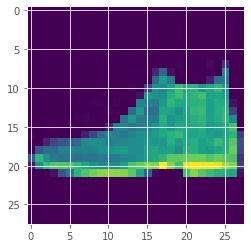

In [170]:
plt.imshow(x_test[0])   # [면, 행, 열]
plt.show()

### 훈련, 테스트 정확도

In [171]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [172]:
model_mlp.score(x_train.reshape(60000,28*28),y_train)

0.9074666666666666

In [173]:
model_mlp.score(x_test.reshape(-1,28*28),y_test)

0.8531

## 케라스

In [177]:
# flatten 쓰면 인코딩 안해도됨. 3차원 데이터
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 822us/step - loss: 1.5924 - acc: 0.5103
Epoch 2/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.9768 - acc: 0.5961
Epoch 3/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.8525 - acc: 0.6562
Epoch 4/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.7250 - acc: 0.7484
Epoch 5/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.6239 - acc: 0.7828
Epoch 6/10
1875/1875 [==============================] - 2s 848us/step - loss: 0.5756 - acc: 0.7943
Epoch 7/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.5383 - acc: 0.8034
Epoch 8/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.5247 - acc: 0.8079
Epoch 9/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.5142 - acc: 0.8119
Epoch 10/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.4900 - acc: 0.8187


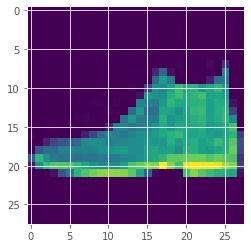

In [178]:
plt.imshow(x_test[0])   # [면, 행, 열]
plt.show()

In [179]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

# 9  -> 부츠

array([9], dtype=int64)

### 훈련 테스트 정확도

In [180]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 1s 593us/step - loss: 0.4739 - acc: 0.8234


[0.4738856256008148, 0.8233833312988281]

In [181]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.5393 - acc: 0.8093


[0.539284348487854, 0.8093000054359436]

# MLP 에서 y는 원핫인코딩안해도돼, 케라스에서는 flatten, sparse 쓰면 인코딩안해도댐
